In [88]:
import pandas as pd
import numpy as np

In [ ]:
# sample data
# Feature: [potatoes, water], Target: servings

X1     X2     y
2      1      3
3      1.5    4.5
4      2      6
5      2.5    7.5
6      3      9

In [89]:
# Feature: [potatoes, water], Target: servings
X = [
    [2, 1],
    [3, 1.5],
    [4, 2],
    [5, 2.5],
    [6, 3]
]

y = [3, 4.5, 6, 7.5, 9]

In [90]:
# You convert your data into NumPy arrays (a format ML models understand).
X = np.array(X)
y = np.array(y)

In [91]:
# pip install scikit-learn

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [92]:
# Let the model learn the pattern from the training data.
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [93]:
print("Coefficients:", model.coef_)     # [a, b] → weights for potatoes and water
print("Intercept:", model.intercept_)   # c → bias term

Coefficients: [1.2 0.6]
Intercept: -8.881784197001252e-16


In [94]:
potatoes = 7
water = 3.5

In [95]:
servings = 1.2*potatoes + 0.6*water + (-8.881784197001252e-16)
servings

10.5

In [96]:
potatoes = 12
water = 10
model_predictions = model.predict(np.array([potatoes,water]).reshape(1, -1))
model_predictions

array([20.4])

In [ ]:
Predicted Actual error squared_error
10.5      10.5   0.0    0.0
14.25     14.50  -0.25 0.0625
16.5      16.5   0.0    0.0
19.75     19.75  0.0   0.0
22.0      20.0   2.0   4.0



In [25]:
total_error = 0.0+0.0625+0.0+0.0+4.0 
mean_error = total_error/5 
mean_squared_error = mean_error*mean_error # Mean Squared Error (MSE)

In [26]:
RMSE = np.sqrt(mean_squared_error)
RMSE

np.float64(0.8125)

In [ ]:
X1     X2     y
2      1      3
3      1.5    4.5
4      2      6
5      2.5    7.5
6      3      9

In [ ]:
w1(potatoes) ,w2(water)

w1 =10,w2= 12
2,1 = 32   3  29
3,1.5 = 48  4.5 43.5

Eroor = 100

w1 = 5,w2 = 6

50
w1 -2,w2 =3

 

In [ ]:
>10

left  right


In [ ]:
# Classifcation 

In [32]:
data = pd.read_csv("Training_Data__20_Examples_.csv")

In [34]:
data

,Hours_Studied,Hours_Slept,Pass(1)/Fail(0)
0,5.9,5.6,0
1,3.5,8.6,0
2,4.8,7.9,0
3,8.6,5.0,0
4,1.0,4.1,0
5,2.1,5.2,0
6,7.0,3.0,0
7,8.4,4.5,0
8,2.2,7.8,0
9,6.2,3.1,0


In [65]:
# Re-import libraries after code state reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Re-create 100 balanced data samples
np.random.seed(200)

# Pass samples
pass_study = np.random.uniform(6, 10, 50).round(1)
pass_sleep = np.random.uniform(7, 9, 50).round(1)
pass_labels = np.ones(50, dtype=int)

# Fail samples
fail_study = np.random.uniform(1, 5, 50).round(1)
fail_sleep = np.random.uniform(3, 6, 50).round(1)
fail_labels = np.zeros(50, dtype=int)

# Combine and shuffle
hours_studied_100 = np.concatenate((pass_study, fail_study))
hours_slept_100 = np.concatenate((pass_sleep, fail_sleep))
labels_100 = np.concatenate((pass_labels, fail_labels))

indices = np.random.permutation(100)
data = pd.DataFrame({
    "Hours_Studied": hours_studied_100[indices],
    "Hours_Slept": hours_slept_100[indices],
    "Pass(1)/Fail(0)": labels_100[indices]
})




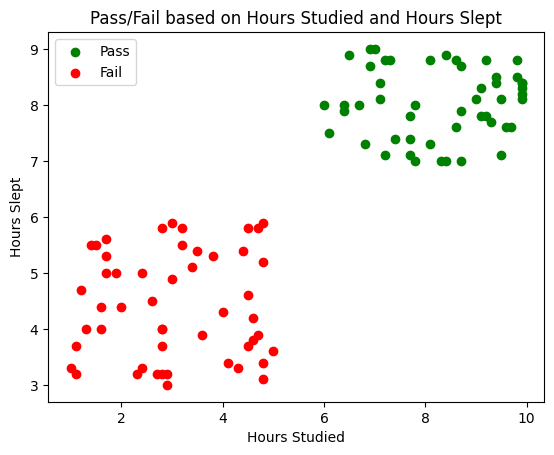

In [97]:
import matplotlib.pyplot as plt

# Separate the data based on the target variable
pass_data = data[data['Pass(1)/Fail(0)'] == 1]
fail_data = data[data['Pass(1)/Fail(0)'] == 0]

# Plot the data
plt.scatter(pass_data['Hours_Studied'], pass_data['Hours_Slept'], color='green', label='Pass')
plt.scatter(fail_data['Hours_Studied'], fail_data['Hours_Slept'], color='red', label='Fail')

# Add labels and legend
plt.xlabel('Hours Studied')
plt.ylabel('Hours Slept')
plt.title('Pass/Fail based on Hours Studied and Hours Slept')
plt.legend()

# Show the plot
plt.show()

In [67]:
# data = pd.concat([pass_data, fail_data], ignore_index=True)

In [98]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare features (X) and target (y)
X = data[['Hours_Studied', 'Hours_Slept']]
y = data['Pass(1)/Fail(0)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


/Users/rams/ml-toy/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [20:40:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [100]:
# Example input for inference
example = pd.DataFrame({'Hours_Studied': [9], 'Hours_Slept': [9]})

# Make prediction
example_prediction = xgb_model.predict(example)

# Output the prediction
print("Prediction for the example:", example_prediction[0])

Prediction for the example: 1


In [101]:
# Feature importance
importances = xgb_model.feature_importances_
importances

array([1., 0.], dtype=float32)

In [102]:
print(xgb_model.get_booster().get_dump()[0])

0:[Hours_Studied<6] yes=1,no=2,missing=2
	1:leaf=-0.630052328
	2:leaf=0.479117751



In [ ]:
# Example input for inference
example = pd.DataFrame({'Hours_Studied': [5], 'Hours_Slept': [9]})

# Make prediction
example_prediction = xgb_model.predict(example)

# Output the prediction
print("Prediction for the example:", example_prediction[0])

Prediction for the example: 0


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# docs = [
#     "dog cat fish",
#     "dog dog cat"
# ]

docs = [
    "The cat sat on the mat.",
    "The dog sat on the log."]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(docs)

# Show the vocab
print("Vocabulary:", vectorizer.get_feature_names_out())

# Show the TF-IDF matrix
print("TF-IDF matrix:\n", X.toarray())

Vocabulary: ['cat' 'dog' 'log' 'mat' 'on' 'sat' 'the']
TF-IDF matrix:
 [[0.44554752 0.         0.         0.44554752 0.31701073 0.31701073
  0.63402146]
 [0.         0.44554752 0.44554752 0.         0.31701073 0.31701073
  0.63402146]]


In [19]:
import pandas as pd
import numpy as np
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [20]:
df = pd.read_csv("spam.csv", encoding="latin-1")[["v1", "v2"]]





In [21]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
len(df)

5572

In [23]:
df.columns = ["label", "text"]

In [24]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:

print(df["label"].value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


In [7]:
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub(r"\d+", "", text)
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remove extra spaces
    text = text.strip()
    return text

In [25]:
df["clean_text"] = df["text"].apply(clean_text)

In [26]:
df.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [27]:
df["label_num"] = df["label"].map({"ham": 0, "spam": 1})

In [28]:
df.head(10)

,label,text,clean_text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...,1
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey there darling its been weeks now ...,1
6,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,as per your request melle melle oru minnaminun...,0
8,spam,WINNER!! As a valued network customer you have...,winner as a valued network customer you have b...,1
9,spam,Had your mobile 11 months or more? U R entitle...,had your mobile months or more u r entitled t...,1


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    df["clean_text"], 
    df["label_num"], 
    test_size=0.2, 
    random_state=42,
    stratify=df["label_num"]
)

In [37]:
1,2,3,4,5,6,7,8,9,10

train = 2,3,4,5,6,7,8,10
test = 1,9

In [ ]:
train = 3,5,7,8,10,9,1,6

test = 2,4

In [29]:
vectorizer = TfidfVectorizer(stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [30]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

/Users/rams/ml-toy/venv/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: divide by zero encountered in matmul
  norm2_w = weights @ weights if weights.ndim == 1 else squared_norm(weights)
/Users/rams/ml-toy/venv/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: overflow encountered in matmul
  norm2_w = weights @ weights if weights.ndim == 1 else squared_norm(weights)
/Users/rams/ml-toy/venv/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: invalid value encountered in matmul
  norm2_w = weights @ weights if weights.ndim == 1 else squared_norm(weights)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [31]:
y_pred = model.predict(X_test_tfidf)

In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9605381165919282

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.99      0.71      0.83       149

    accuracy                           0.96      1115
   macro avg       0.97      0.86      0.90      1115
weighted avg       0.96      0.96      0.96      1115



In [ ]:
20 examples in your test set

1

In [35]:
sample_email = ["I have won prize of 10 million in the lottery."]

sample_email_clean = [clean_text(text) for text in sample_email]
sample_email_tfidf = vectorizer.transform(sample_email_clean)

prediction = model.predict(sample_email_tfidf)
print("Predicted label:", "spam" if prediction[0] else "ham")

Predicted label: spam


In [38]:
import joblib

# Save the model to a file
joblib.dump(model, "logistic_regression_model.pkl")

['logistic_regression_model.pkl']

In [ ]:
[1,2,3,4,5]